# Customer Segmentation

A clustering model to perform Customer Segmentation from bank credit card data. The data used is information on credit card usage for the last 6 months from Google Big Query

# Query SQL to get data

In [1]:
# SELECT *
# FROM `ftds-hacktiv8-project.phase1_ftds_026_rmt.credit-card-information`
# WHERE MOD(CUST_ID, 2) = 0;

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [3]:
df = pd.read_csv("/content/P1G6_Set_1_masayu.csv")
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [4]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


In [7]:
df.nunique()

CUST_ID                             4475
BALANCE                             4439
BALANCE_FREQUENCY                     42
PURCHASES                           3218
ONEOFF_PURCHASES                    2073
INSTALLMENTS_PURCHASES              2357
CASH_ADVANCE                        2155
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            44
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                46
CASH_ADVANCE_TRX                      55
PURCHASES_TRX                        147
CREDIT_LIMIT                         153
PAYMENTS                            4350
MINIMUM_PAYMENTS                    4317
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

# Exploratory Data Analysis (EDA)

##Check duplicate data

In [8]:
df.duplicated().sum()

0

##Check missing values

In [9]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Insight** : Becase CREDIT_LIMIT and MINIMUM_PAYMENT content have some null values. We will handling the missing values by replace it by medians.

In [10]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [11]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Insight** : There's no more null values.

##Check the Distributions of Features

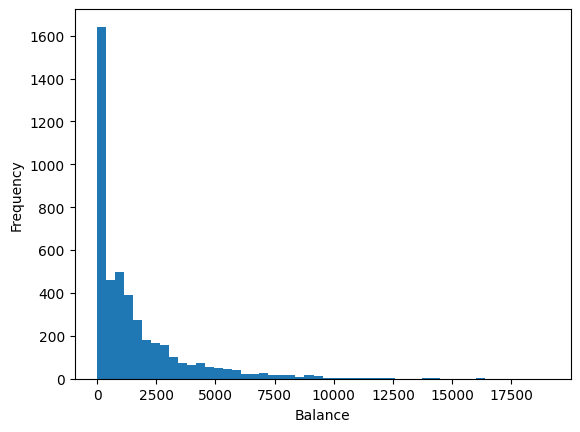

In [12]:
plt.hist(df['BALANCE'], bins=50)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

**Insight** : The distribution of balance shows a significant distribution with many customers having lower balances, but a few customers have very high balances.

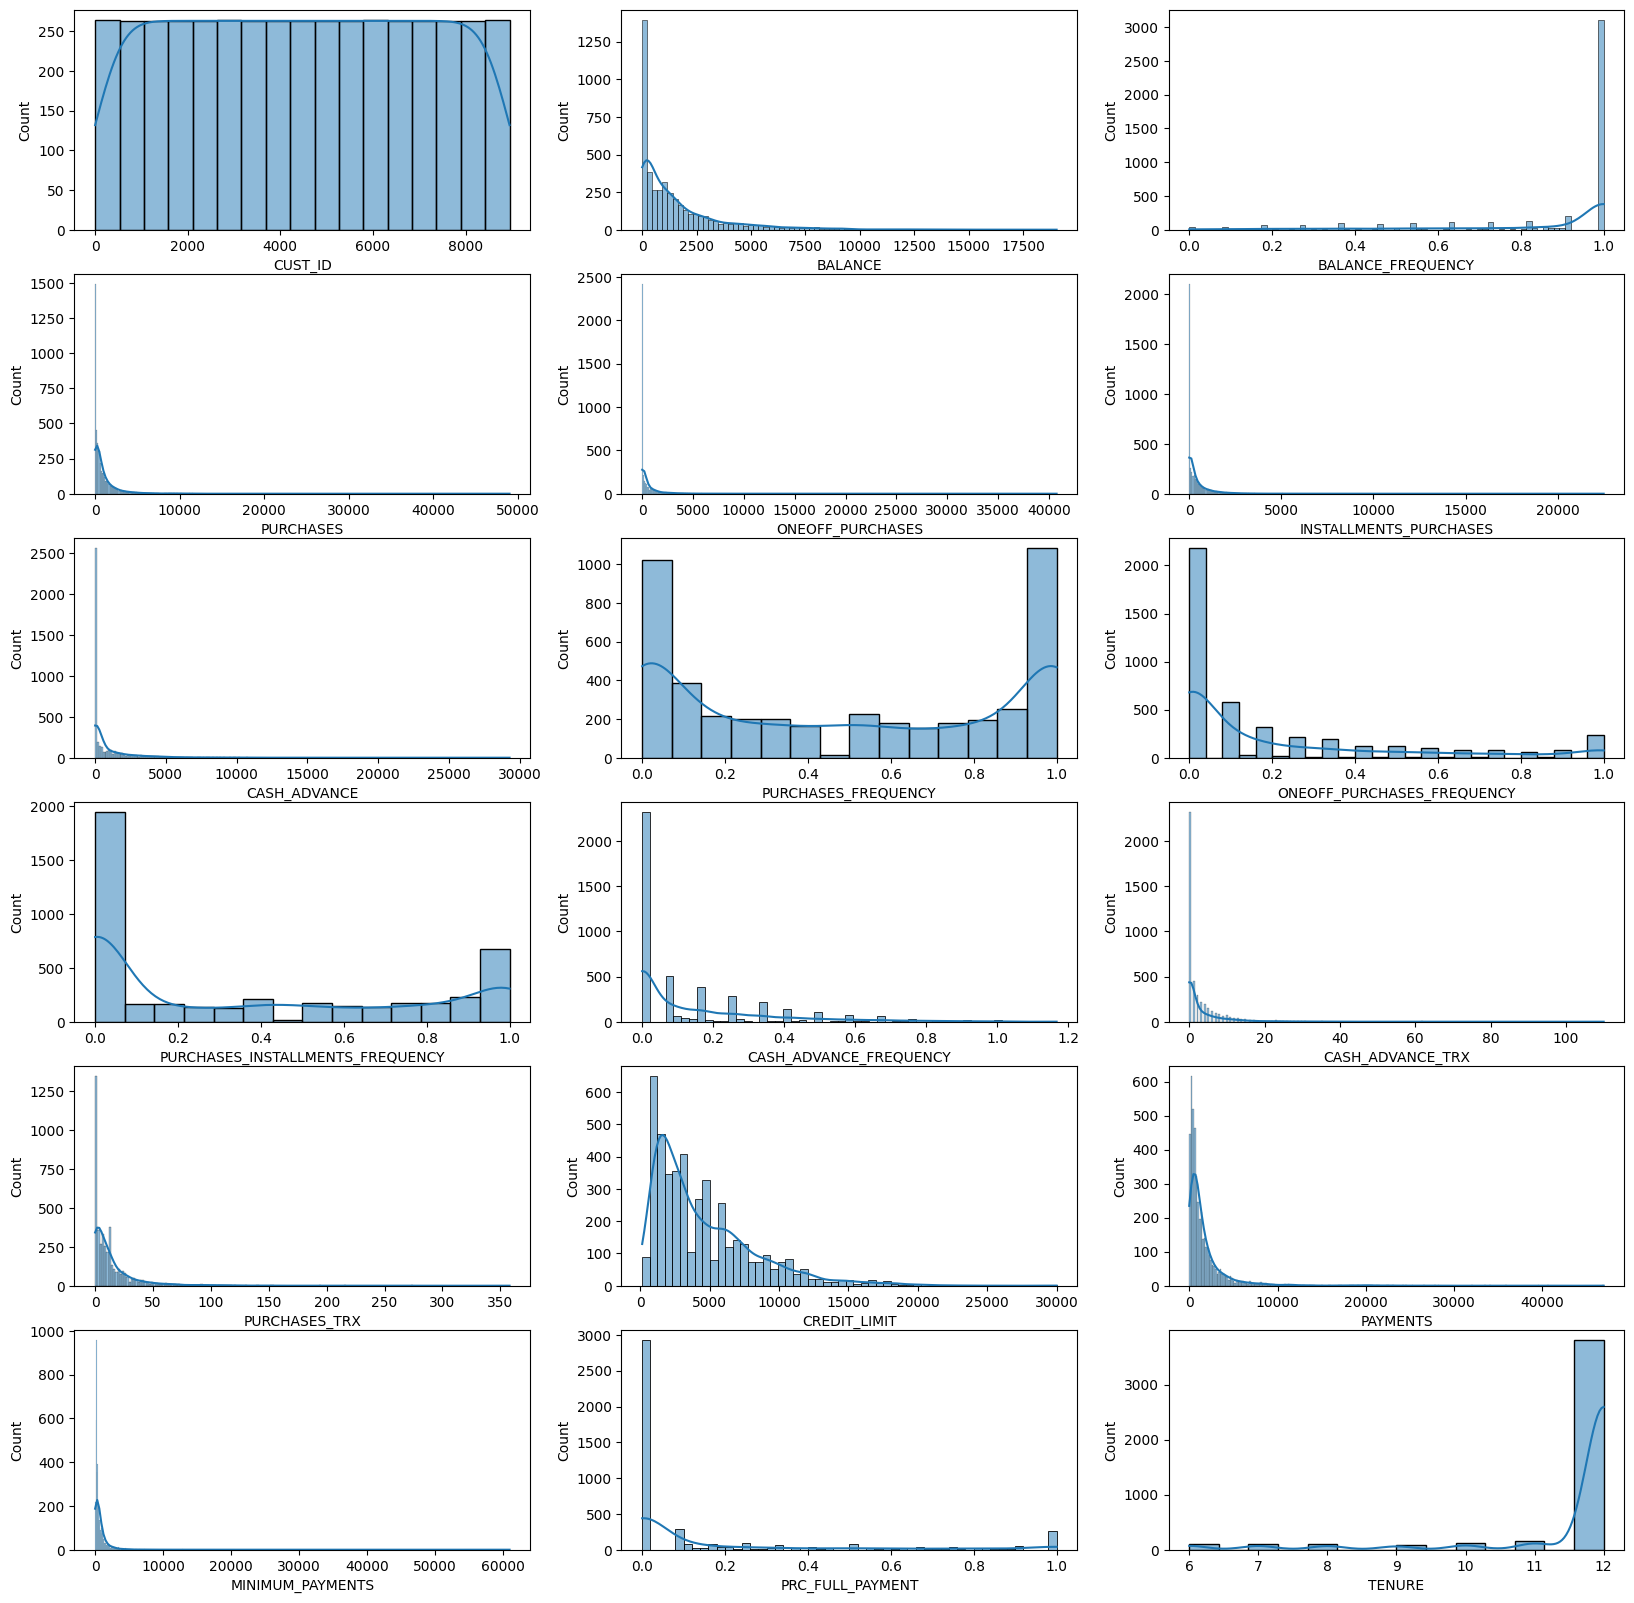

In [13]:
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot(df[col] , ax=ax , kde=True)
        plt.xlabel(col)
plt.show()

**Insight** :
- Most of the Features are Right Skewed with Most of the values being or close to zero
- but BALANCE_FREQUENCY and TENURE being left skewed.
- 'PURCHASES_FREQUENCY' with having a similar amount of zeros and ones.

- **Check Correlation**

<Axes: >

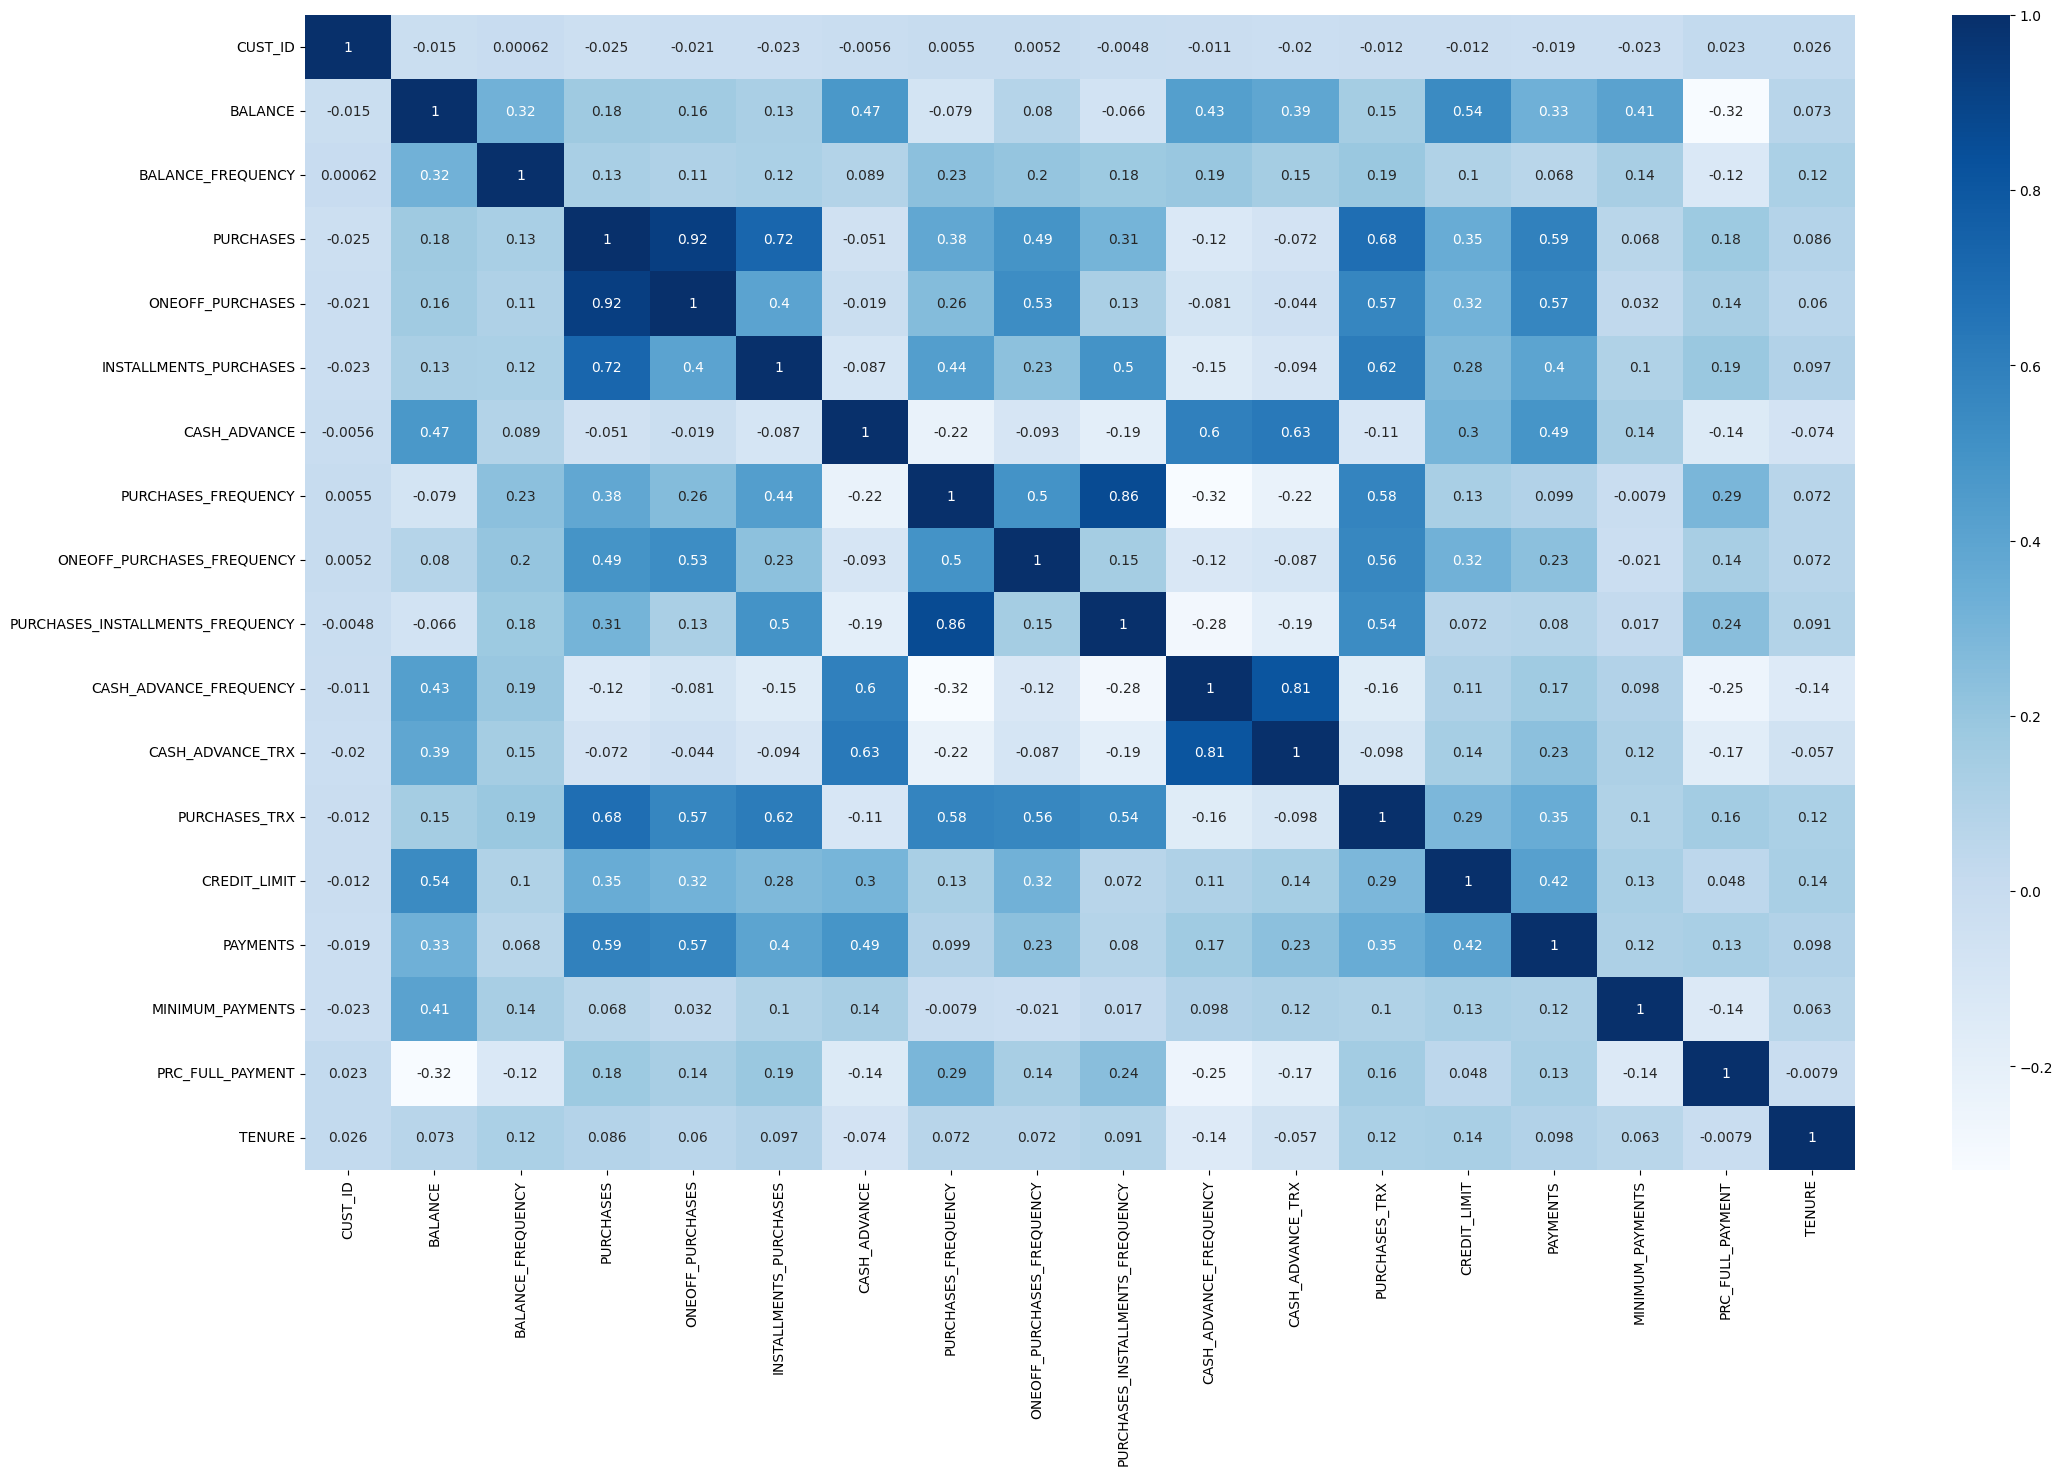

In [14]:
plt.figure(figsize=(25,15))
sns.heatmap( df.corr(), annot=True, cmap='Blues')

Insight : From correlation result, PURSHACE feature have highly correlated with ONEOFF_PURCHASES and PURCHASES_INSTALLMENTS_FREQUENCY. It is better to drop the PURCHASES because the data contained are also present in ONEOFF_PURCHASES and PURCHASES_INSTALLMENTS_FREQUENCY columns. In this case, the split data is preferable to keep than the aggregated one.

In [15]:
df_final = df.drop(['PURCHASES'], axis=1)
df_final.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,309.854995,0.0,8
1,1902,943.584041,0.875,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,309.854995,0.0,8
3,3426,461.455720,1.000,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8


# Feature Engineering

## Check outliers

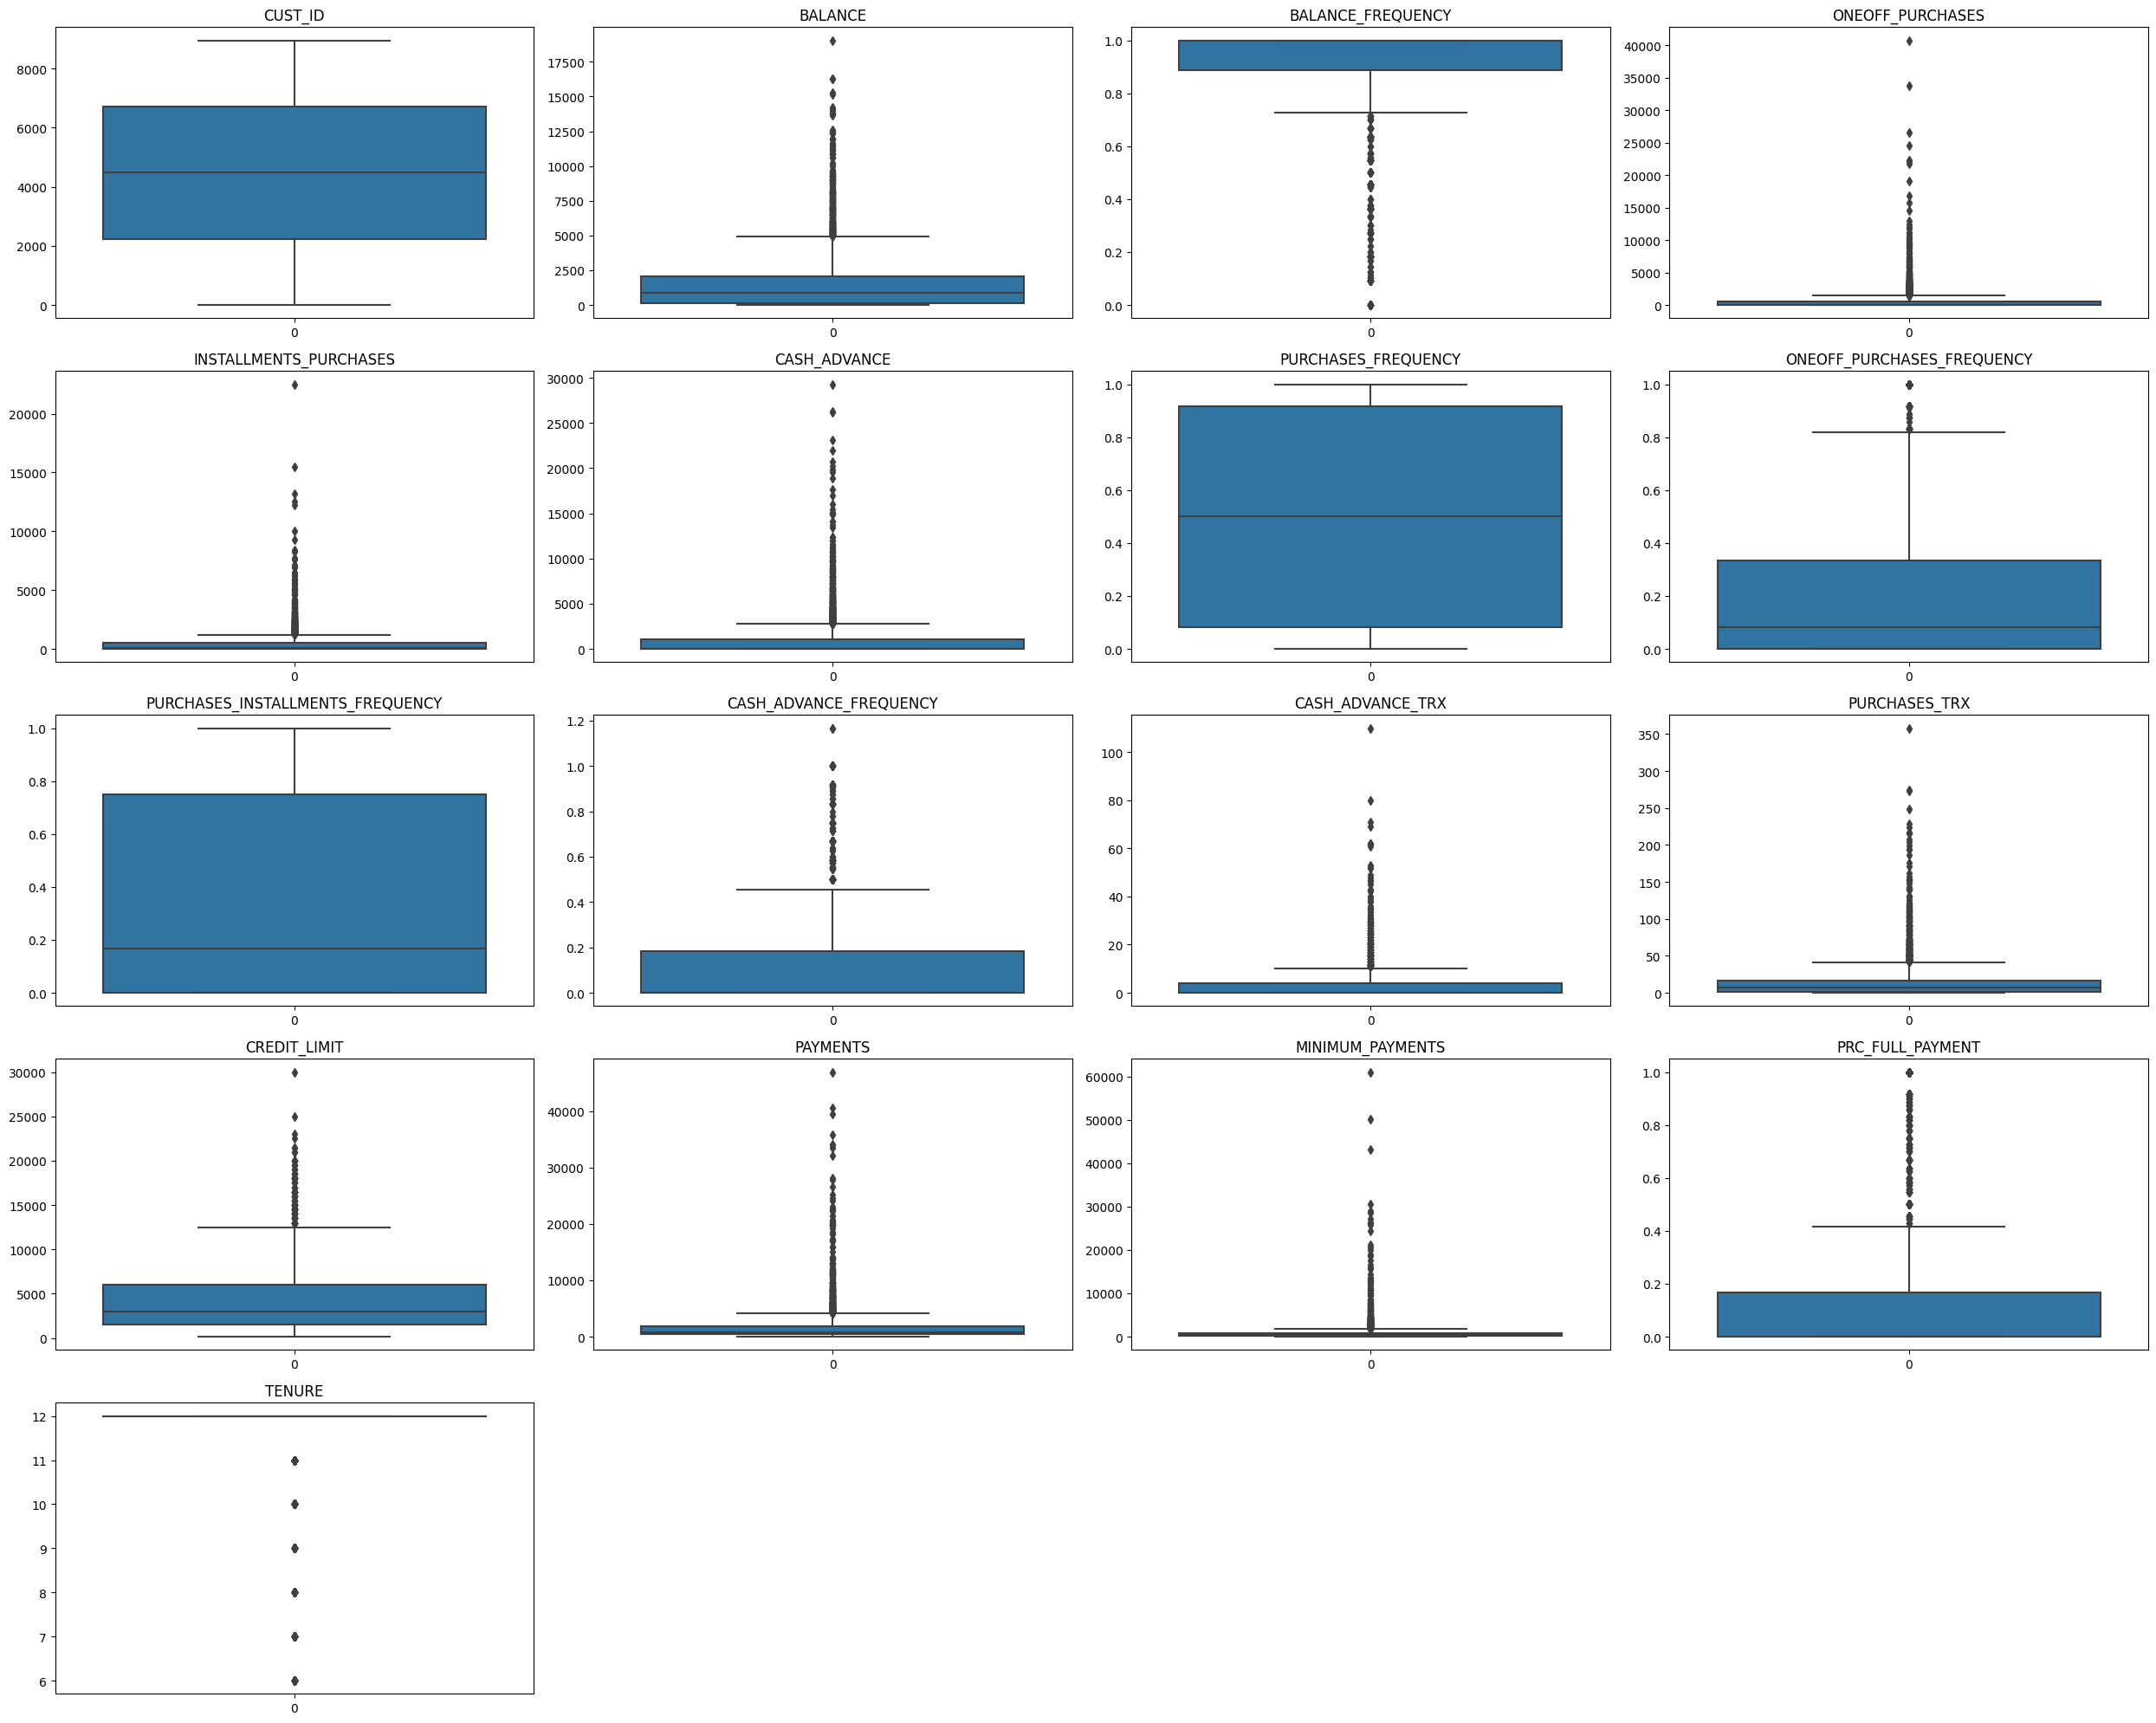

In [16]:
# plot for outliers detection
plt.figure(figsize=(25,20))
for i in range(len(df_final.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df_final[df_final.columns[i]])
    plt.title(df_final.columns[i])

plt.tight_layout()

In [17]:
def outlier_thresholds(dataframe, variable, low_quantile=0.15, up_quantile=0.85):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [18]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [19]:
for col in df_final.columns:
    replace_with_thresholds(df_final, col)

Insight : there are many outliers but we can't drop them because they may contain important information, so we replaces the outliers with threshold values. This process helps mitigate the impact of outliers without drop them.

## Data Scaling

In [20]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_final)

##Dimension Reduction using PCA

Since the dataset has a lot of features (17 features), an attempt will be made to condense the number of features to a more manageable set that can be utilized in subsequent clustering analysis. In this case, we will apply PCA to reduce the number of features. We will make components for all features in the data,the determination of the required number of components will be based on the cumulative explained variance provided by these components.

In [21]:
pca = PCA(random_state=42).fit(scaled_df)
pca_data = pca.transform(scaled_df)
pca_labels = ['PC' + str(component) for component in range(1,len(pca.components_)+1)]
df_pca = pd.DataFrame(pca_data, columns=pca_labels)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.372267,-2.699082,0.712438,0.141527,1.554771,-1.403184,2.025048,0.050864,-0.779800,-0.287499,0.135931,-0.115709,-0.049298,-0.163328,0.043577,0.046576,0.0
1,-1.253934,-1.694169,0.195269,-1.113848,-0.003513,-0.962734,-0.155238,-0.481602,0.035735,-0.083048,0.269063,-0.122283,0.034825,-0.135459,0.147207,0.058126,0.0
2,-1.471656,-2.653986,1.210525,-0.045457,1.284409,-0.830934,1.962418,0.183969,-0.904397,-0.149658,0.100795,-0.289255,-0.027905,-0.151731,0.050811,0.026409,0.0
3,-0.983842,-1.693329,0.444834,-1.146754,-0.601135,-0.447120,-0.354251,-0.610811,0.422400,-0.118138,0.278156,0.337906,-0.164316,-0.000750,0.125490,0.037384,0.0
4,-0.651591,-1.245977,0.948978,-1.407452,-0.660443,-0.243008,-0.261499,-0.718326,0.291413,-0.216879,0.215210,1.149513,-0.482293,-0.068668,0.110560,-0.004363,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,-2.725082,0.357343,-0.123712,0.895030,-1.535176,-0.205937,-0.141378,-0.443090,0.239758,-0.737212,-0.486021,0.001960,0.178196,-0.143052,-0.377459,0.038957,0.0
4471,-2.716319,1.505249,0.697863,1.978927,-0.767859,1.411251,0.147378,-0.873932,1.142050,0.572794,0.072335,-0.211045,0.187161,0.085153,-0.918507,0.030352,0.0
4472,0.014049,2.865893,0.172790,0.013118,-1.313547,-0.239483,0.157936,2.137823,-0.266261,0.138601,-0.483539,-0.961122,-0.011878,-0.250218,-0.456218,-0.260143,0.0
4473,-1.664169,4.795676,0.420660,0.022632,-1.394605,-0.165425,0.317003,0.662915,-2.009423,-0.336951,0.773064,0.615612,-0.218746,0.799868,0.425658,-0.352259,0.0


In [22]:
ratio_PCA = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
ratio_PCA_df = pd.DataFrame(pca.explained_variance_ratio_ * 100, index= pca_labels)
ratio_PCA_df

,0
PC1,27.750801
PC2,24.078677
PC3,9.020507
PC4,7.665423
PC5,6.465401
PC6,6.251180
PC7,4.322321
PC8,3.501129
PC9,3.114276
PC10,2.257114


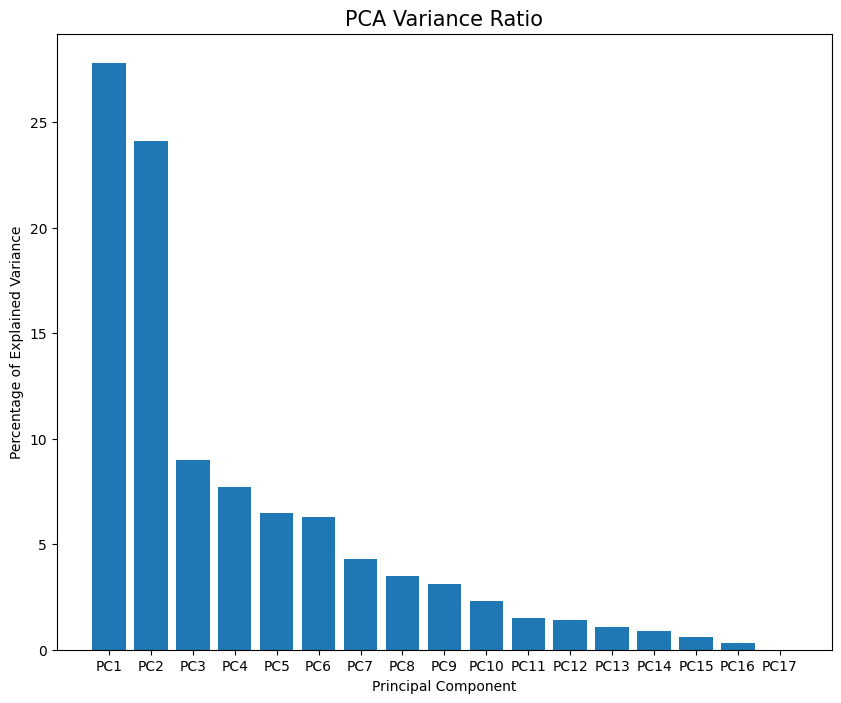

In [23]:
fig = plt.figure(figsize=(10,8))
plt.bar(x=range(1, len(ratio_PCA)+1), height=ratio_PCA, tick_label=pca_labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('PCA Variance Ratio', fontsize=15)
plt.show()

**Insight** : The outcome indicates that the initial and second components are capable of accounting for more than fifty percent of the variability present in the entire dataset. Our subsequent analysis will specifically concentrate on these two principal components.

#  K-Means Clustering

To support the choice of the cluster count, we will employ the elbow method to calculate inertia. Inertia assesses the effectiveness of K-Means clustering on a dataset. It is computed by measuring the squared distance between each data point and its centroid within a cluster and summing these squared distances. Our goal is to identify the point where the reduction in inertia starts to decelerate.

In [24]:
df_pca[['PC1','PC2']]

,PC1,PC2
0,-1.372267,-2.699082
1,-1.253934,-1.694169
2,-1.471656,-2.653986
3,-0.983842,-1.693329
4,-0.651591,-1.245977
...,...,...
4470,-2.725082,0.357343
4471,-2.716319,1.505249
4472,0.014049,2.865893
4473,-1.664169,4.795676


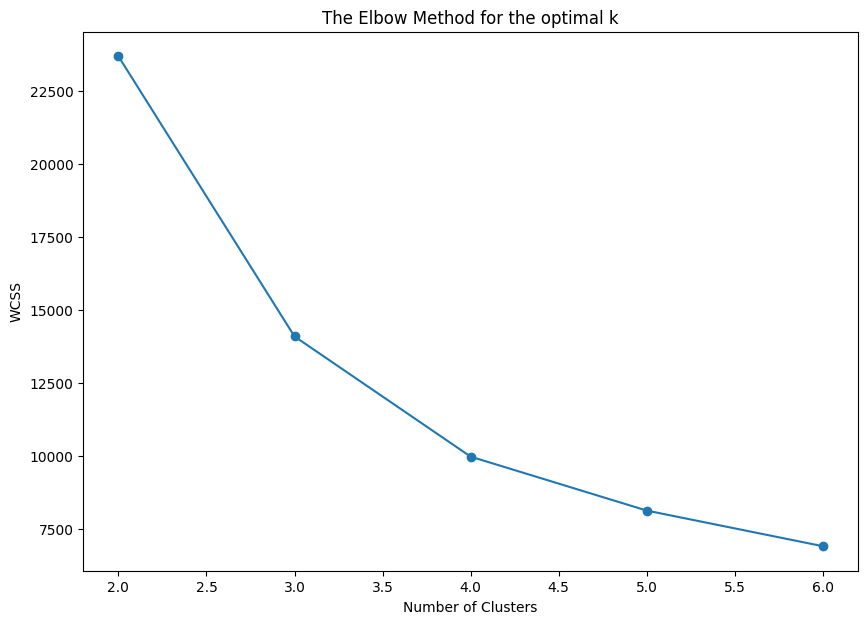

In [25]:
#Calculate elbow method
pca_clusters = pd.DataFrame(df_pca[['PC1','PC2']])

inertia = []
K = np.arange(2,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=8)
    kmeanModel.fit(pca_clusters)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(10,7))
plt.plot(K, inertia, marker ="o")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method for the optimal k')
plt.show()

Insight : From the plot we got **K** = **3**, to ensure the selection number of clusters, we will also make use of another metric called Silhouette Score. It is used to evaluate the quality of clusters created in terms of how well samples are clustered with other samples that are similar to each other.

Silhouette Score for K=2: [0.3696308400172463]
Silhouette Score for K=3: [0.3696308400172463, 0.4262691354031562]
Silhouette Score for K=4: [0.3696308400172463, 0.4262691354031562, 0.40790142408173186]
Silhouette Score for K=5: [0.3696308400172463, 0.4262691354031562, 0.40790142408173186, 0.37791830247582414]
Silhouette Score for K=6: [0.3696308400172463, 0.4262691354031562, 0.40790142408173186, 0.37791830247582414, 0.38108457342985763]


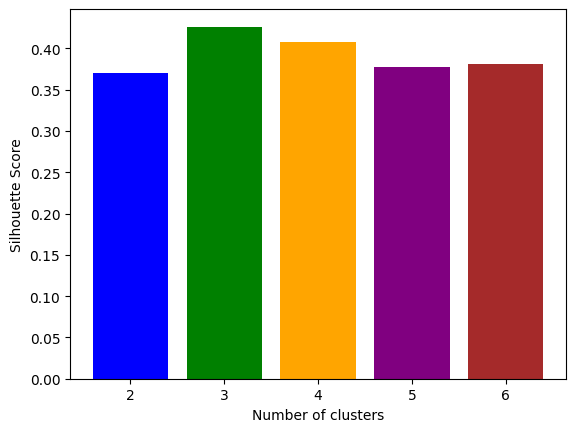

In [26]:
#calculate sillhoute score
silhouette_scores = []

for n_cluster in range(2, 7):
    silhouette_scores.append(
    silhouette_score(df_pca[['PC1','PC2']], KMeans(n_clusters = n_cluster).fit_predict(df_pca[['PC1','PC2']])))
    print(f"Silhouette Score for K={n_cluster}: {silhouette_scores}")

# Plotting a bar graph to compare the results
bar_colors = ['blue', 'green', 'orange', 'purple', 'brown']
k = [2, 3, 4, 5, 6]
plt.bar(k, silhouette_scores, )
plt.bar(k, silhouette_scores, color = bar_colors)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

**Insight** : Highest silhouette score is **k** = **3** . Following the evaluation of the results using the two metrics, we will choose 3 as the number of clusters. This decision is supported by the observation that the decrease in inertia begins to decelerate at k=3, and the highest silhouette score is achieved when the number of clusters is set to 3.

In [27]:
k_means_clusters = KMeans(n_clusters=3,random_state=10).fit(pca_clusters)
cluster_center = k_means_clusters.cluster_centers_
cluster_preds = k_means_clusters.predict(pca_clusters)

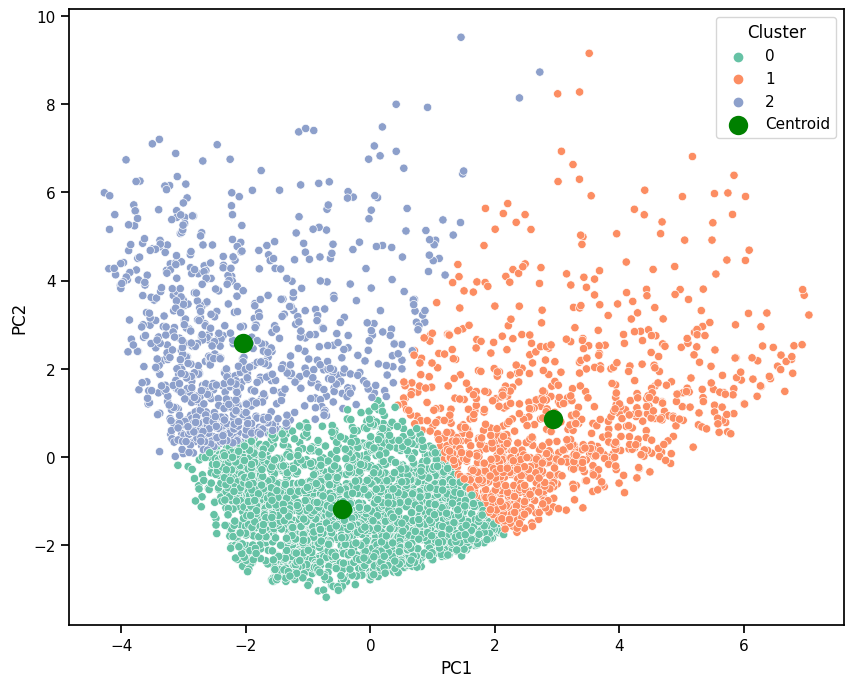

In [28]:
pca_clusters['cluster'] = cluster_preds

plt.figure(figsize=(10,8))
sns.set_context(context = 'notebook', font_scale=1)

sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster', data = pca_clusters, palette='Set2')
plt.scatter(cluster_center[:,0],cluster_center[:,1], marker = "o", s=80, linewidths = 5, zorder = 10, c='green',label="Centroid")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title="Cluster")
plt.show()

# After Cluster

In [31]:
labels=k_means_clusters.labels_
clusters=pd.concat([df_final, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,788.0,16.581535,0.125,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0.0,2.0,1200.0,0.000000,309.854995,0.0,12,0
1,1902.0,943.584041,0.875,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0.0,1.0,1000.0,215.325023,410.484825,0.0,12,0
2,2322.0,1.979916,0.125,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0.0,1.0,1500.0,0.000000,309.854995,0.0,12,0
3,3426.0,461.455720,1.000,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0.0,1.0,1000.0,258.032630,151.696433,0.0,12,0
4,3976.0,1053.594730,1.000,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0.0,1.0,1500.0,397.090516,227.143184,0.0,12,0


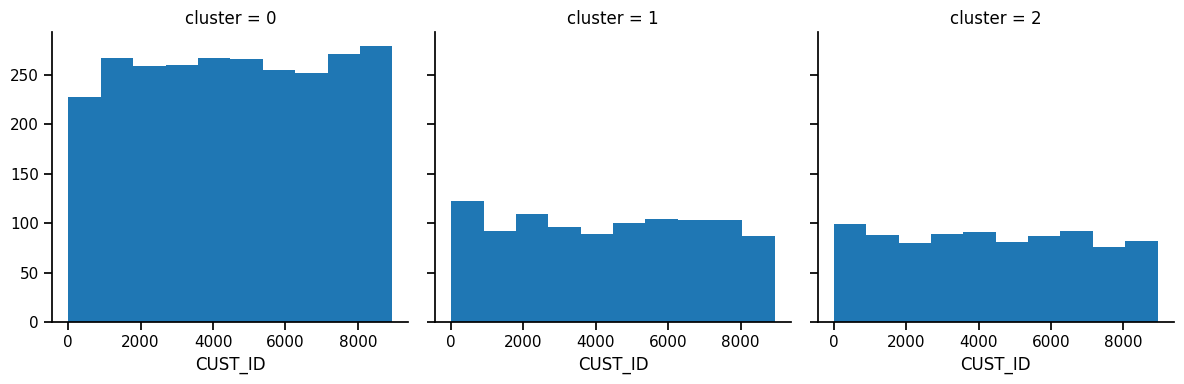

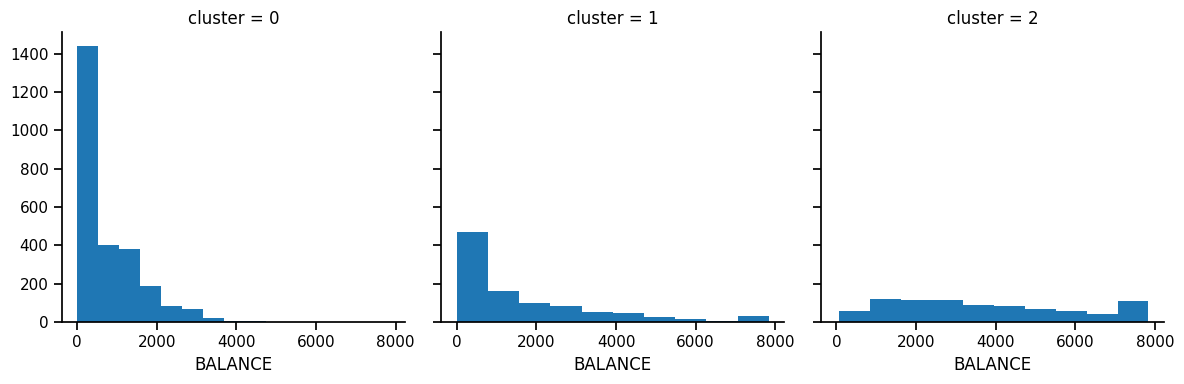

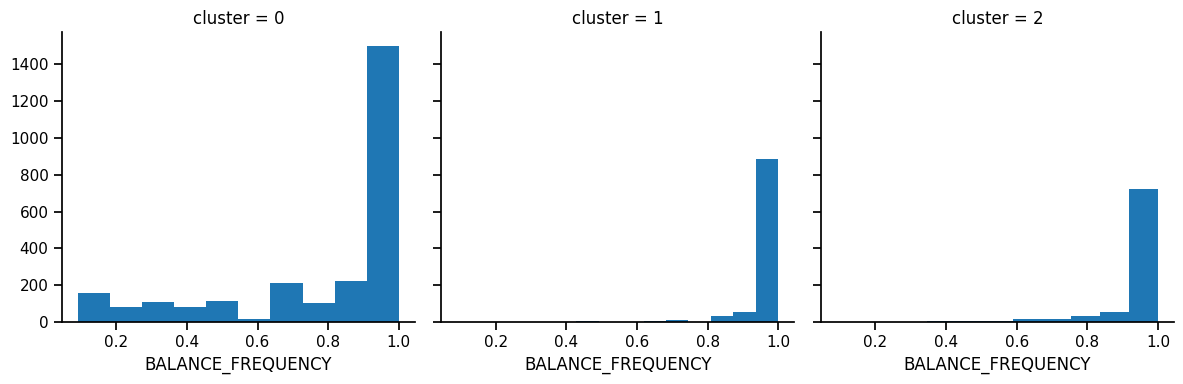

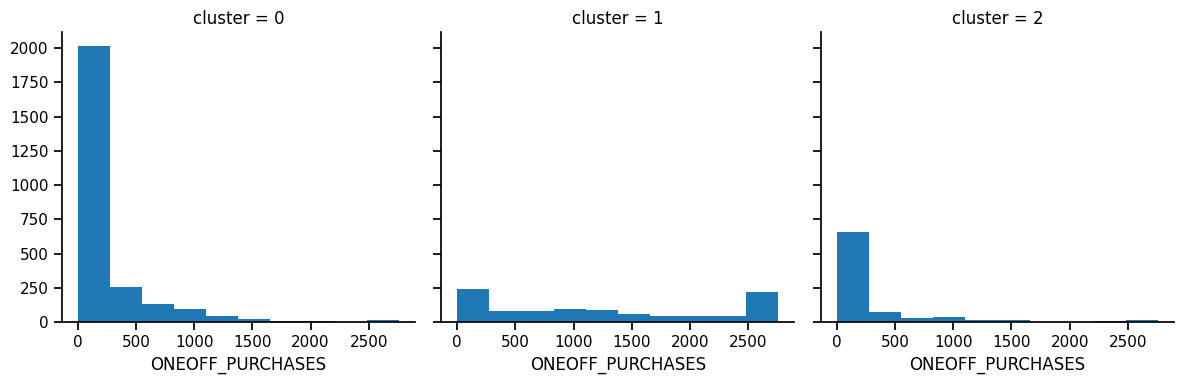

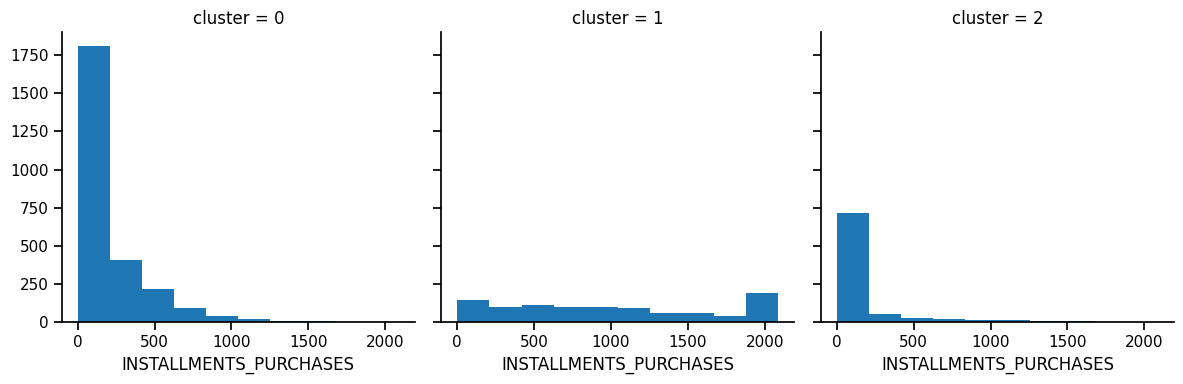

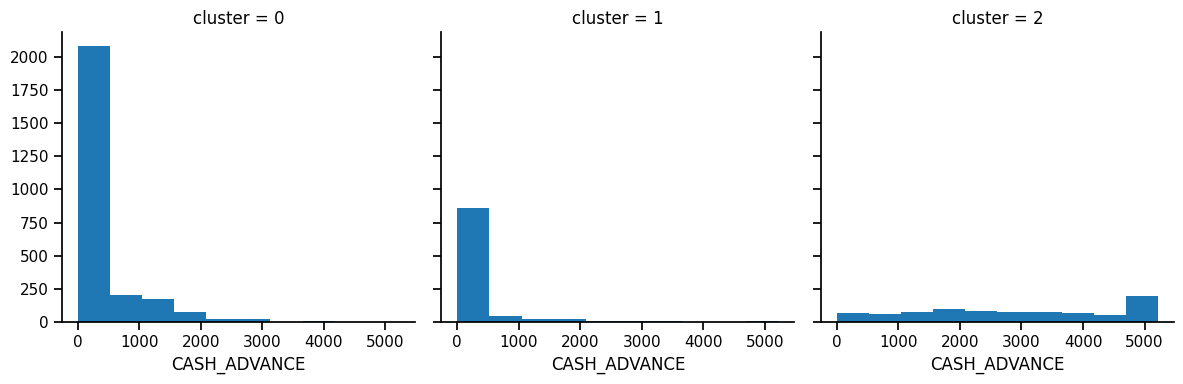

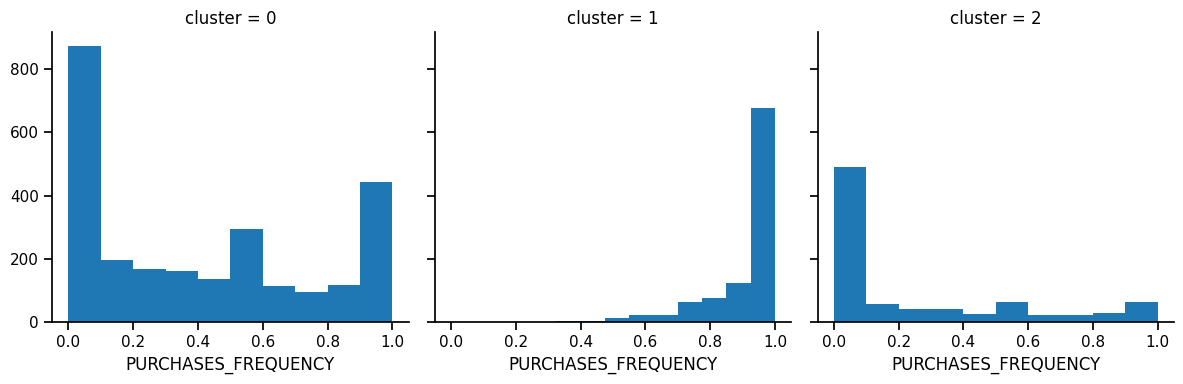

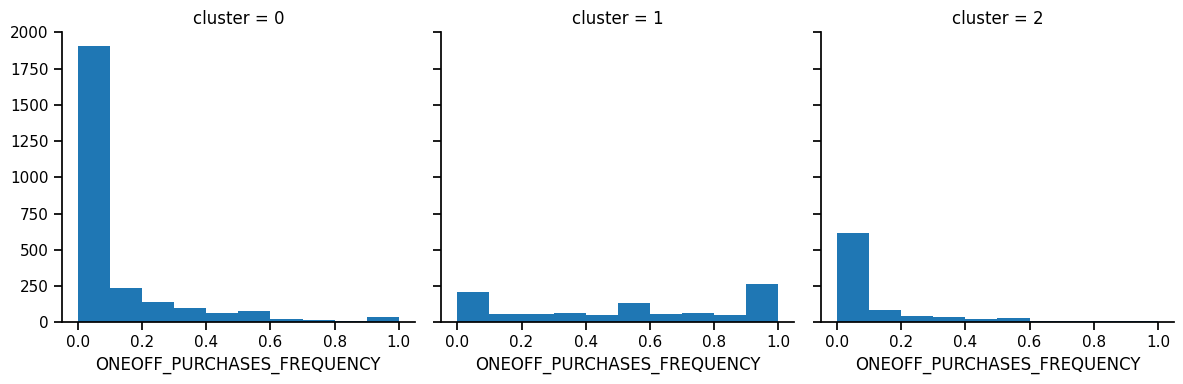

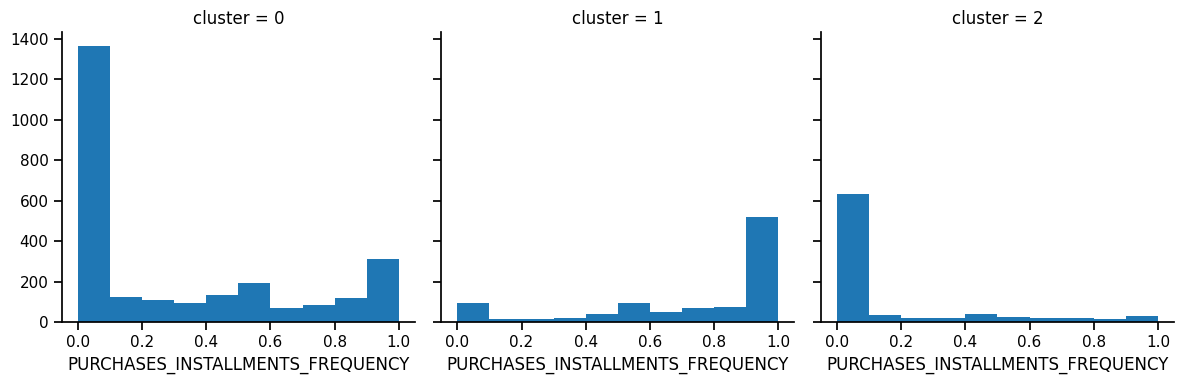

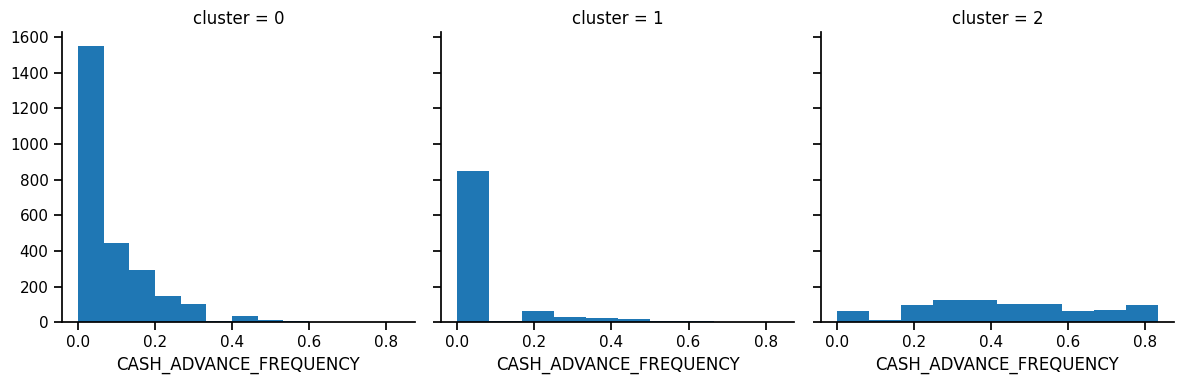

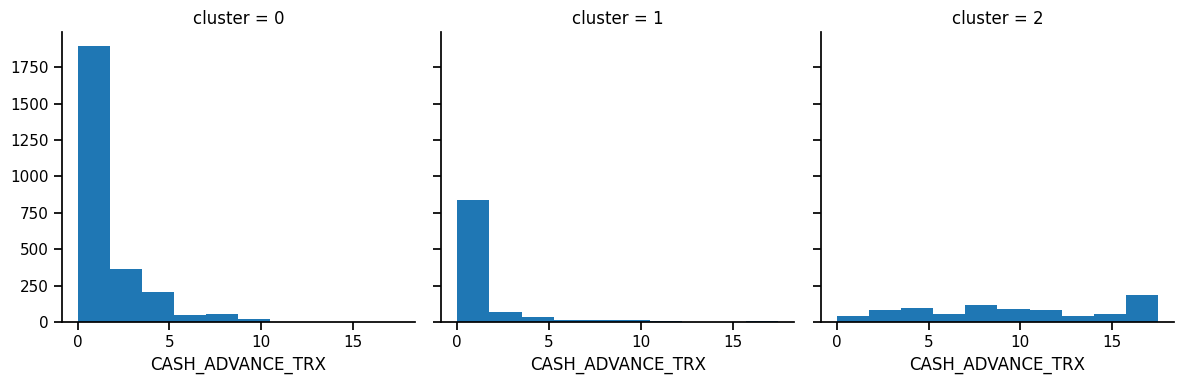

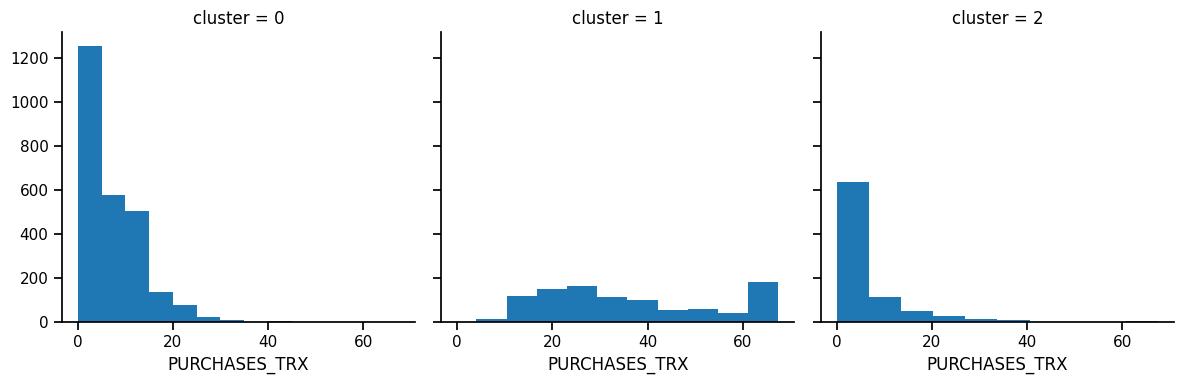

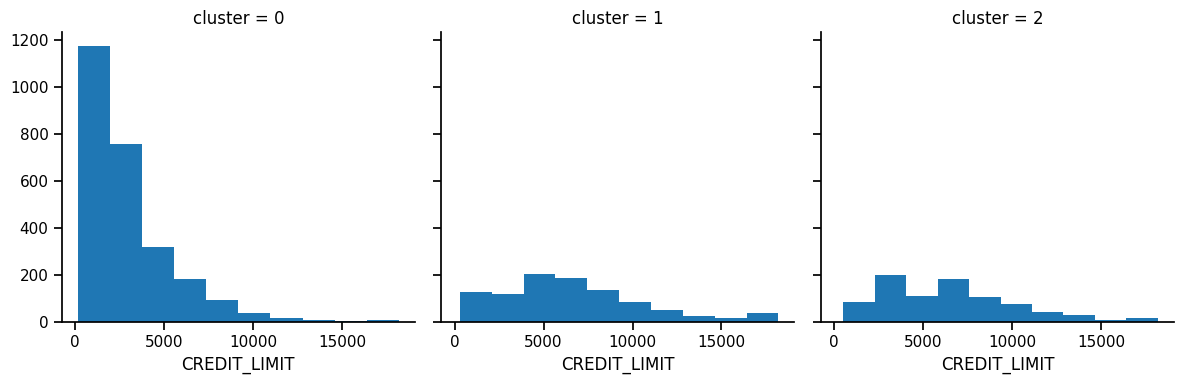

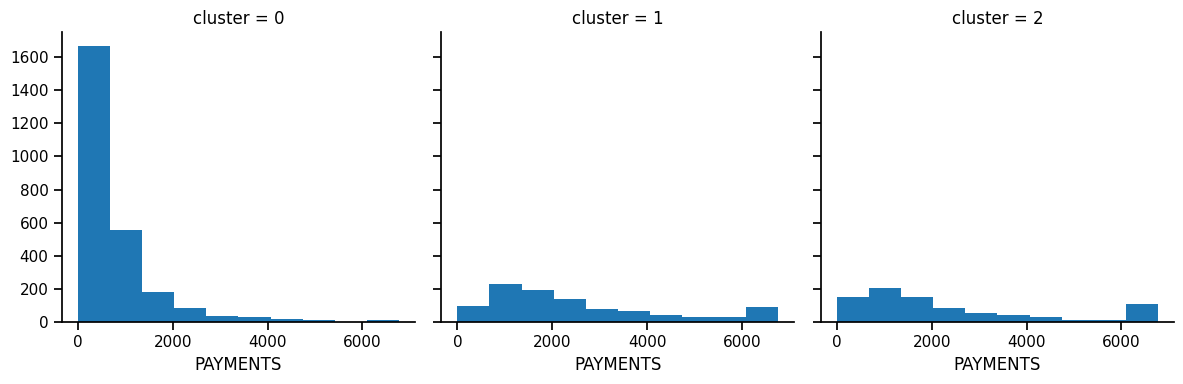

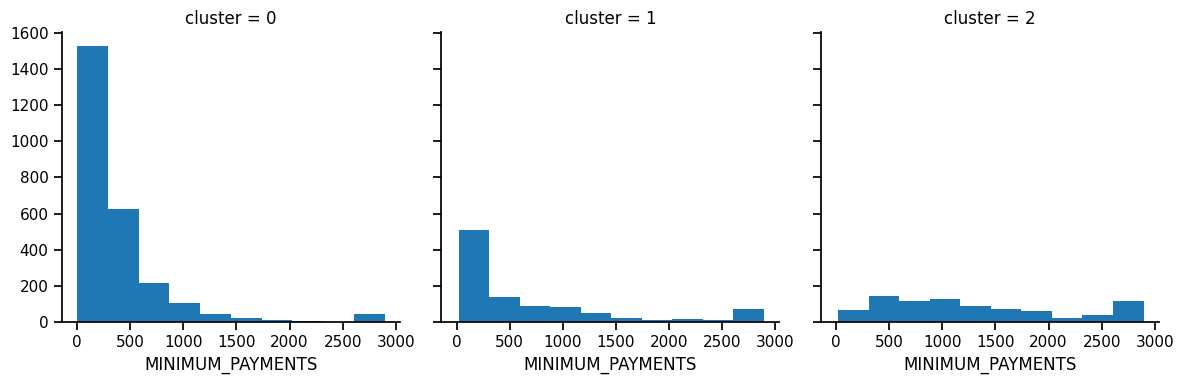

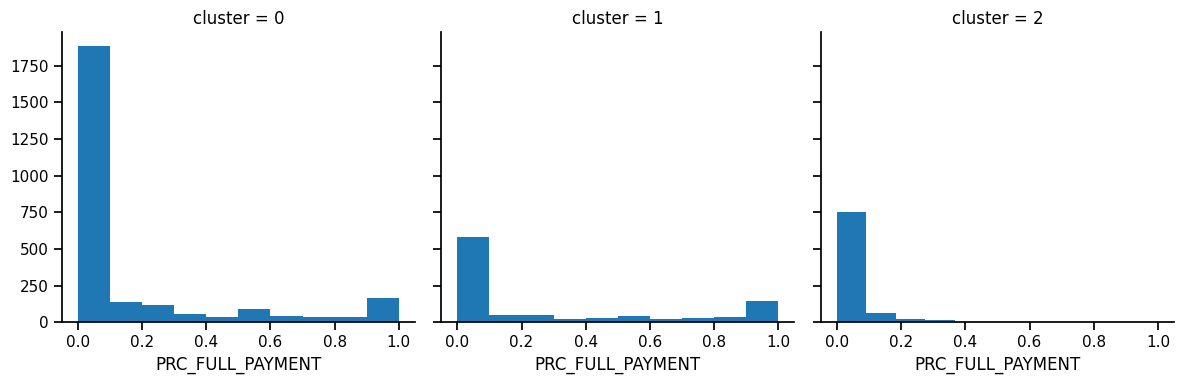

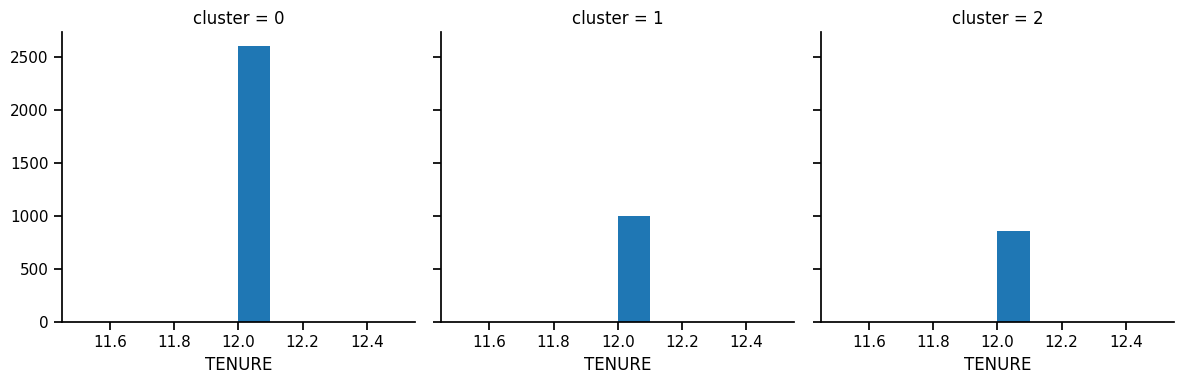

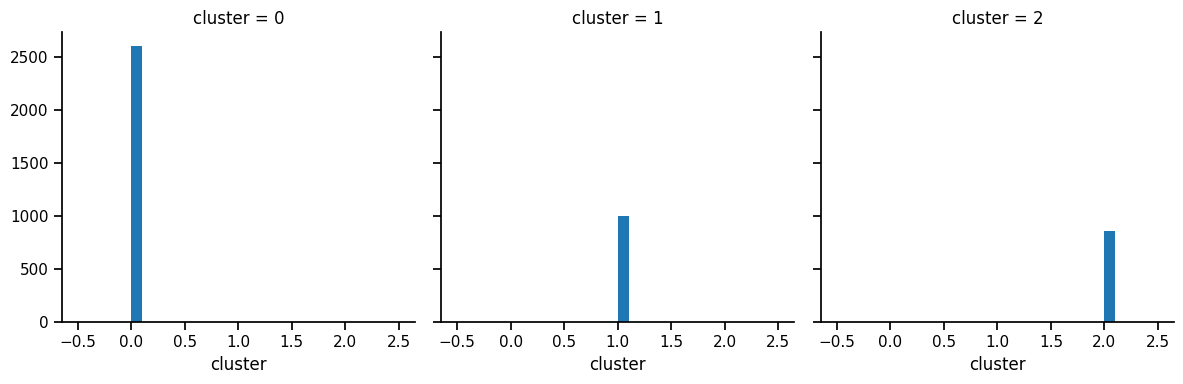

In [32]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster', height=4)
    grid.map(plt.hist, c)

In [33]:
clusters['cluster'].value_counts()

0    2604
1    1006
2     865
Name: cluster, dtype: int64

In [34]:
clusters.groupby('cluster').mean()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,4547.522273,710.955227,0.813204,200.914366,174.670440,317.109345,0.403278,0.106724,0.293326,0.071816,1.236751,6.465054,2988.657621,778.717364,381.466808,0.151457,12.0
1,4368.930417,1686.598970,0.976964,1260.100278,1011.477127,293.320751,0.932700,0.528840,0.741267,0.051448,1.038767,36.728628,6628.411350,2551.553308,697.737715,0.275371,12.0
2,4385.211561,3740.423734,0.959829,258.877491,130.493289,2979.606046,0.236838,0.111878,0.143109,0.412648,9.646243,5.177457,6474.104046,2400.610929,1304.505755,0.037084,12.0


# Model Inference

In [35]:
df_inf=df_pca.copy()
df_inf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.372267,-2.699082,0.712438,0.141527,1.554771,-1.403184,2.025048,0.050864,-0.779800,-0.287499,0.135931,-0.115709,-0.049298,-0.163328,0.043577,0.046576,0.0
1,-1.253934,-1.694169,0.195269,-1.113848,-0.003513,-0.962734,-0.155238,-0.481602,0.035735,-0.083048,0.269063,-0.122283,0.034825,-0.135459,0.147207,0.058126,0.0
2,-1.471656,-2.653986,1.210525,-0.045457,1.284409,-0.830934,1.962418,0.183969,-0.904397,-0.149658,0.100795,-0.289255,-0.027905,-0.151731,0.050811,0.026409,0.0
3,-0.983842,-1.693329,0.444834,-1.146754,-0.601135,-0.447120,-0.354251,-0.610811,0.422400,-0.118138,0.278156,0.337906,-0.164316,-0.000750,0.125490,0.037384,0.0
4,-0.651591,-1.245977,0.948978,-1.407452,-0.660443,-0.243008,-0.261499,-0.718326,0.291413,-0.216879,0.215210,1.149513,-0.482293,-0.068668,0.110560,-0.004363,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,-2.725082,0.357343,-0.123712,0.895030,-1.535176,-0.205937,-0.141378,-0.443090,0.239758,-0.737212,-0.486021,0.001960,0.178196,-0.143052,-0.377459,0.038957,0.0
4471,-2.716319,1.505249,0.697863,1.978927,-0.767859,1.411251,0.147378,-0.873932,1.142050,0.572794,0.072335,-0.211045,0.187161,0.085153,-0.918507,0.030352,0.0
4472,0.014049,2.865893,0.172790,0.013118,-1.313547,-0.239483,0.157936,2.137823,-0.266261,0.138601,-0.483539,-0.961122,-0.011878,-0.250218,-0.456218,-0.260143,0.0
4473,-1.664169,4.795676,0.420660,0.022632,-1.394605,-0.165425,0.317003,0.662915,-2.009423,-0.336951,0.773064,0.615612,-0.218746,0.799868,0.425658,-0.352259,0.0


In [36]:
inf_model = df_inf.drop(['PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17'], axis=1)
inf_model

,PC1,PC2
0,-1.372267,-2.699082
1,-1.253934,-1.694169
2,-1.471656,-2.653986
3,-0.983842,-1.693329
4,-0.651591,-1.245977
...,...,...
4470,-2.725082,0.357343
4471,-2.716319,1.505249
4472,0.014049,2.865893
4473,-1.664169,4.795676


In [38]:
if 'predicted_cluster' in inf_model.columns:
    inf_model = inf_model.drop('predicted_cluster', axis=1)

pred_cluster = k_means_clusters.predict(inf_model)
inf_model['predicted_cluster'] = pred_cluster


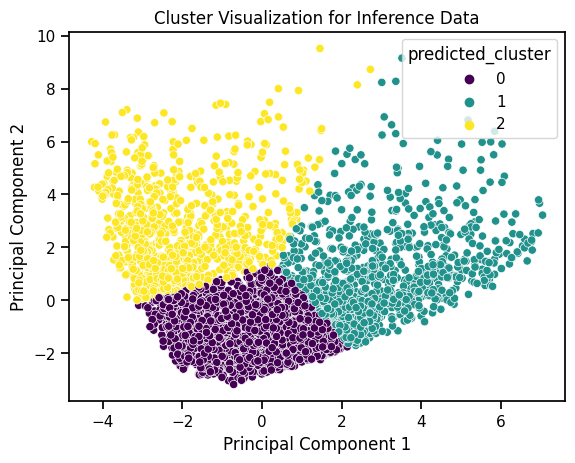

In [39]:
# Scatter plot of the predicted clusters
sns.scatterplot(x='PC1', y='PC2', hue='predicted_cluster', data=inf_model, palette='viridis')
plt.title('Cluster Visualization for Inference Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Conclusion

A. **Cluster model insight :**
* Cluster 0:

    - Balance: Moderate balance levels.
    - Purchase Behavior: Moderate purchase frequency with a preference for both - one-off and installment purchases.
    - Cash Advance: Moderate usage of cash advance services.
    - Credit Limit: Lower credit limit compared to other clusters.
    - Payment Behavior: Payments are made moderately.

* Cluster 1:

    - Balance: Higher balance levels.
    - Purchase Behavior: Frequent purchases, particularly one-off purchases.
    - Cash Advance: Substantial usage of cash advance services.
    - Credit Limit: Relatively high credit limit.
    - Payment Behavior: Consistent payments, but not as frequent as Cluster 0.
   
* Cluster 2:

    - Balance: Lower balance levels.
    - Purchase Behavior: Moderate purchase frequency, leaning towards installment purchases.
    - Cash Advance: Moderate usage of cash advance services.
    - Credit Limit: Higher credit limit compared to Cluster 0.
    - Payment Behavior: Payments are made less frequently.


**B. Recommendation**
* Busines startegies
  - Consider adjusting credit limits based on the cluster's financial behavior.
  - Develop communication strategies to engage customers in Cluster 0 and 2 for improved purchases and payment frequency.

* Technical
    - Add more data to the dataset for better modeling.
    - The clustering outcome can be applied in Regression to estimate the credit limit for a new user and in Classification to assign a new user to the appropriate cluster.